In [1]:
import numpy
from matplotlib import pyplot
import matplotlib.cm as cm
%matplotlib inline

In [2]:
n = 192

dh = 5/(n-1)

T = 8000


In [3]:
def ftcs(nt, dt, dh, Du, Dv, F, k):
    uvinitial = numpy.load('./uvinitial.npz')
    U = uvinitial['U']
    V = uvinitial['V']
    for n in range(1,nt):
        Un = U.copy()
        Vn = V.copy()
        
        U[1:-1, 1:-1] = Un[1:-1, 1:-1]\
                       + Du*(dt/(dh**2) * (Un[2:, 1:-1] - 2*Un[1:-1, 1:-1] + Un[:-2, 1:-1]))\
                       + Du*(dt/(dh**2) * (Un[1:-1, 2:] - 2*Un[1:-1, 1:-1] + Un[1:-1, :-2]))\
                       - Un[1:-1, 1:-1]*Vn[1:-1, 1:-1]**2*dt\
                       + F*(1-Un[1:-1, 1:-1])*dt
        V[1:-1, 1:-1] = Vn[1:-1,1:-1]\
                       + Dv*(dt/(dh**2) * (Vn[2:, 1:-1] - 2*Vn[1:-1, 1:-1] + Vn[:-2, 1:-1]))\
                       + Dv*(dt/(dh**2) * (Vn[1:-1, 2:] - 2*Vn[1:-1, 1:-1] + Vn[1:-1, :-2]))\
                       + Un[1:-1, 1:-1]*Vn[1:-1, 1:-1]**2*dt\
                       - (F + k)*Vn[1:-1, 1:-1]*dt
#boundary conditions of U and V
                             
        U[0,:], V[0,:] = U[1,:], V[1,:]
        U[-1,:], V[-1,:] = U[-2,:], V[-2,:]
        U[:,0],V[:,0] = U[:,1],V[:,1]
        U[:,-1],V[:,-1] = U[:,-2],V[:,-2]
        
    return U
                            

In [4]:
Du, Dv, F, k = 0.00016, 0.00008, 0.035, 0.065 # Bacteria 1 

dt = .9 * dh**2 / (4*max(Du,Dv))

nt = int(T/dt)

U_1 = ftcs(nt, dt, dh, Du, Dv, F, k)

In [5]:
U_1[100,::40]

array([ 0.92468763,  0.85016693,  0.66816509,  0.90198113,  0.90395252])

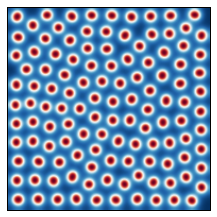

In [7]:
fig = pyplot.figure(figsize=(8,5))
pyplot.subplot(121)
pyplot.imshow(U_1, cmap = cm.RdBu)
pyplot.xticks([]), pyplot.yticks([]);

In [8]:
Du, Dv, F, k = 0.00016, 0.00008, 0.060, 0.062 # Coral
dt = .9 * dh**2 / (4*max(Du,Dv))

nt = int(T/dt)
U_2 = ftcs(nt, dt, dh, Du, Dv, F, k)

In [9]:
U_2[100,::40]

array([ 0.44592315,  0.78544904,  0.42847393,  0.69711491,  0.38771071])

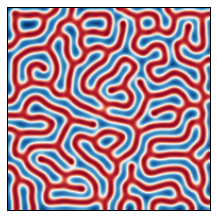

In [11]:
fig = pyplot.figure(figsize=(8,5))
pyplot.subplot(121)
pyplot.imshow(U_2, cmap = cm.RdBu)
pyplot.xticks([]), pyplot.yticks([]);

In [13]:
Du, Dv, F, k = 0.00019, 0.00005, 0.060, 0.062 # Fingerprint
dt = .9 * dh**2 / (4*max(Du,Dv))

nt = int(T/dt)
U_3 = ftcs(nt, dt, dh, Du, Dv, F, k)
U_3[100,::40]

array([ 0.57273962,  0.31453947,  0.3656405 ,  0.56866369,  0.52804078])

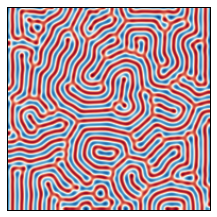

In [14]:
fig = pyplot.figure(figsize=(8,5))
pyplot.subplot(121)
pyplot.imshow(U_3, cmap = cm.RdBu)
pyplot.xticks([]), pyplot.yticks([]);

In [21]:
Du, Dv, F, k = 0.00010, 0.00010, 0.018, 0.050 # Spirals
dt = .9 * dh**2 / (4*max(Du,Dv))

nt = int(T/dt)
U_4 = ftcs(200, dt, dh, Du, Dv, F, k)
U_4[100,::40]

array([ 0.9882206 ,  0.93715894,  0.93611204,  0.88195402,  0.87124902])

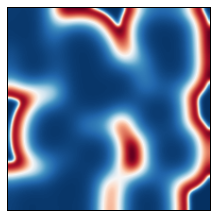

In [22]:
fig = pyplot.figure(figsize=(8,5))
pyplot.subplot(121)
pyplot.imshow(U_4, cmap = cm.RdBu)
pyplot.xticks([]), pyplot.yticks([]);

In [17]:
Du, Dv, F, k = 0.00012, 0.00008, 0.020, 0.050 # Spirals Dense
dt = .9 * dh**2 / (4*max(Du,Dv))

nt = int(T/dt)
U_5 = ftcs(nt, dt, dh, Du, Dv, F, k)
U_5[100,::40]

array([ 1.,  1.,  1.,  1.,  1.])

In [ ]:
fig = pyplot.figure(figsize=(8,5))
pyplot.subplot(121)
pyplot.imshow(U_5, cmap = cm.RdBu)
pyplot.xticks([]), pyplot.yticks([]);

In [ ]:
Du, Dv, F, k = 0.00010, 0.00016, 0.020, 0.050 # Spirals Fast
dt = .9 * dh**2 / (4*max(Du,Dv))

nt = int(T/dt)
U_6 = ftcs(nt, dt, dh, Du, Dv, F, k)
U_6[100,::40]

In [ ]:
fig = pyplot.figure(figsize=(8,5))
pyplot.subplot(121)
pyplot.imshow(U_6, cmap = cm.RdBu)
pyplot.xticks([]), pyplot.yticks([]);

In [ ]:
Du, Dv, F, k = 0.00016, 0.00008, 0.020, 0.055 # Unstable
dt = .9 * dh**2 / (4*max(Du,Dv))

nt = int(T/dt)
U_7 = ftcs(nt, dt, dh, Du, Dv, F, k)
U_7[100,::40]

In [ ]:
fig = pyplot.figure(figsize=(8,5))
pyplot.subplot(121)
pyplot.imshow(U, cmap = cm.RdBu)
pyplot.xticks([]), pyplot.yticks([]);